<a href="https://colab.research.google.com/github/juathanduarte/cncomp/blob/main/juathan_duarte_relatorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Relatório 3**
##Cálculo Numérico Computacional - T2

> **Nome:** Juathan Coelho Duarte

> **Matrícula:** 19200989

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

#**Métodos**

###**Lagrange**

In [ ]:
def lagrange(m, x, y, z):
    pz = 0

    for i in range(m):
        c = 1
        d = 1

        for j in range(m):
            if i != j:
                c = c*(z - x[j])
                d = d*(x[i] - x[j])
        pz = pz + c/d*y[i]
        
    return pz

###**Newton**

In [ ]:
def newton(m, x, y, z):
    pz = 0
    dely = [0]*m
    
    for i in range(m):
        dely[i] = y[i]
        
    for i in range(1, m, 1):
        for k in range(m - 1, i + 1, -1):
            dely[k] = (dely[k] - dely[k - 1])/(x[k] - x[k - i])
            
    pz = dely[m - 1]
    
    for i in range(m - 1, 1, -1):
        pz = pz * (z - x[i]) + dely[i]
    
    return pz

###**Spline**

In [ ]:
def spline(abscissas, ordenadas):
    n=len(ordenadas)
    a = np.copy(ordenadas)
    b = [0] * (n-1)
    d = [0] * (n-1)
    h = [0] * (n-1)
    
    for i in range(n-1):
        h[i] = abscissas[i+1] - abscissas[i]

    A = [[1] + [0] * (n - 1)]
    
    for i in range(1, n-1):
        linha = [0] * n
        linha[i - 1] = h[i - 1]
        linha[i] = 2*(h[i-1] + h[i])
        linha[i+1] = h[i]
        A.append(linha)
        
    A.append([0] * (n-1) + [1])

    B = [0]
    
    for i in range(1, n-1):
        linha = 3*(a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]
        B.append(linha)
    B.append(0)

    c =  np.linalg.solve(A, B)

    for i in range(n-1):
        b[i] = (a[i+1]-a[i])/h[i] - (h[i]/3)*(c[i+1]+2*c[i])
        d[i] = (c[i+1]-c[i])/(3*h[i])

    s = []

    for i in range(n-1):
        s.append(lambda x, j=i: d[j]*((x-abscissas[j])**3) + c[j]*((x-abscissas[j])**2) + b[j]*(x-abscissas[j]) + a[j])

    return s

###**Gráfico Dispersão**

In [ ]:
def dispersalGraphic(param1, param2, param3, param2Title, param3Title, xLabelTitle, yLabelTitle):
    if (param3 != ' '):
        plt.scatter(param1, param2, label=param2Title, color='red')
        plt.scatter(param1, param3, label=param3Title, color='blue')
        plt.xlabel(xLabelTitle)
        plt.ylabel(yLabelTitle)
        plt.legend()
        plt.show()
    else:
        plt.scatter(param1, param2, label=param3Title, color='red')
        plt.xlabel(param2Title)
        plt.ylabel(param3Title)
        plt.legend()
        plt.show()

###**Gráfico com Linha**

In [ ]:
def lineGraphic(param1, param2, param3, a_param2, b_param2, a_param3, b_param3, xLabelTitle, yLabelTitle, titleParam2, titleParam3, regressionTitleParam2, regressionTitleParam3):
    if (param3 != ' '):
        plt.scatter(param1, param2, color='red', label=titleParam2)
        plt.scatter(param1, param3, color='blue', label=titleParam3)

        plt.plot(param1, [a_param2 * x + b_param2 for x in param1], color='red', label=regressionTitleParam2)

        interp_x = np.linspace(min(param1), max(param1), 300)
        interp_y = np.interp(interp_x, param1, param3)
        plt.plot(interp_x, interp_y, color='blue', label=regressionTitleParam3)

        plt.xlabel(xLabelTitle)
        plt.ylabel(yLabelTitle)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        plt.scatter(param1, param2, color='red')

        interp_x = np.linspace(min(param1), max(param1), 300)
        interp_y = np.interp(interp_x, param1, param2)
        plt.plot(interp_x, interp_y, color='red')

        plt.xlabel(xLabelTitle)
        plt.ylabel(yLabelTitle)
        plt.grid(True)
        plt.show()

In [ ]:
def regressaoLinear(x, y):
    n = len(x)
    x2 = [0]*n
    xy = [0]*n
    somaX = 0
    somaY = 0
    somaX2 = 0
    somaXY = 0
    a = 0
    b = 0

    for i in range(n):
        x2[i] = x[i] * x[i]
        xy[i] = x[i] * y[i]
        somaX = somaX + x[i]
        somaY = somaY + y[i]
        somaX2 = somaX2 + x2[i]
        somaXY = somaXY + xy[i]

    a = (n * somaXY - somaX * somaY) / (n * somaX2 - somaX * somaX)
    b = (somaY - a * somaX) / n

    return a, b

###**Métodos dos Mínimos Quadrados**

In [ ]:
def mmq(x, y, dim):
  grau = dim

  # Criar vetores X e Y
  X, Y = x, y;
  pontos = len(x)

  # cria vetores h
  H = np.zeros((grau+1, pontos))
  for i in range(len(H)):
    for j in range(len(H[0])):
      H[i][j] = pow(X[j], i)

  # Montar o sistema Ax = b
  A = np.zeros((grau+1, grau+1))
  b = np.zeros(grau+1)

  for i in range(len(A)):
    for j in range(len(A)):
      A[i][j] = H[i].dot(H[j])
    b[i] = H[i].dot(Y)

  # Resolver o sistema Ax = b
  x = np.linalg.solve(A,b)
  # Retorna os coeficientes
  return x

#**Exercícios**

###**Exercício 1**

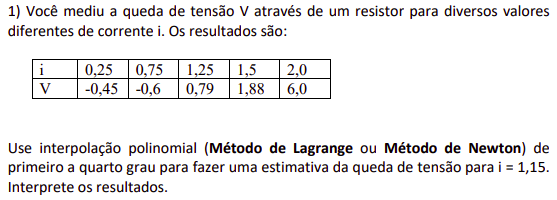

In [ ]:
x = [0.25, 0.75, 1.25, 1.5, 2.0]
y = [-0.45, -0.6, 0.79, 1.88, 6]
z = 1.15

for i in range(len(x) - 1):
    print("--- Grau", i + 1, "---", "\n", "Lagrange:", lagrange(i+1, x, y, z), "|", "Newton:", newton(i+1, x, y, z))

--- Grau 1 --- 
 Lagrange: -0.45 | Newton: -0.45
--- Grau 2 --- 
 Lagrange: -0.72 | Newton: -0.6
--- Grau 3 --- 
 Lagrange: 0.3887999999999997 | Newton: 0.711
--- Grau 4 --- 
 Lagrange: 0.41683199999999987 | Newton: 0.5065999999999999


**Resposta:** *Os resultados obtidos para o polinômio de grau 1 são iguais, isso ocorre porque um polinômio de grau 1 é uma linha reta e há somente uma linha reta que pode ser ajustada para passar pelos dois pontos mais próximos de 1,15. Já para o polinômio de grau 2, o método de Lagrange produziu o valor -0,72 e o Newton -0,6, isso ocorre pois o método de interpolação de Lagrange usa a fórmula geral para um polinômio de grau n, já o método de Newton usa as diferenças divididas finitas para obter um polinômio de grau u, levando a um resultado ligeiramente diferente. Para o polinômio de grau 3, o método de Lagrange produziu o valor 0,39 (+/-) e o Newton 0,71, neste caso, os resultados produzidos foram bastante diferentes, sugerindo comportamentos diferentes do polinômio próximo ao ponto 1,15. Já para o polinômio de grau 4, o método de Lagrange produziu o valor 0,42 (+/-) e o Newton 0,51 (+/-), novamente, ambos métodos produziram polinômios de grau 4 diferentes para ajustar os dados. Em razão do exposto, os resultados da interpolação no ponto 1,15 variam de acordo com o método utilizado e o grau do polinômio, cabe ao usuário decidir qual método e grau utilizar para suas necessidades, considerando as características dos dados e a precisão desejada na interpolação.*

###**Exercício 2**

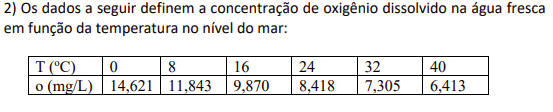

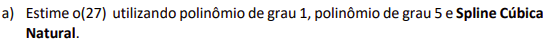

In [ ]:
x = [0, 8, 16, 24, 32, 40]
y = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
z = 27

print("--- Grau 1 ---", "\n", "Lagrange:", lagrange(1, x, y, z), "|", "Newton:", newton(1, x, y, z))

print ("--- Grau 5 ---", "\n", "Lagrange:", lagrange(5, x, y, z), "|", "Newton:", newton(5, x, y, z))

s = spline(x, y)

print("--- Spline ---", "\n", "Spline:", s[4](z))

--- Grau 1 --- 
 Lagrange: 14.621 | Newton: 14.621
--- Grau 5 --- 
 Lagrange: 7.967420959472656 | Newton: 7.523906249999999
--- Spline --- 
 Spline: 7.971819396680622


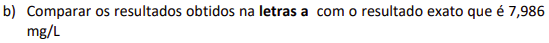

**Resposta:** *Para o polinômio interpolador de grau 1, temos que tanto o método de Lagrange quanto o de Newton forneceram um resultado próximo de 14,621, o que indica que esse polinômio não é adequado. Já para o polinômio interpolador de grau 5, temos que o método de Lagrange obteve um resultado de 7,967, enquanto o método de Newton obteve um resultado de 7,524. Nesse caso, ambos os resultados são próximos ao valor exato, mas o método de Lagrange apresentou um resultado mais próximo. Por fim, o método de spline obteve um resultado de 7,972, o mais próximo do valor exato, indicando que esse método, no cenário atual, é a melhor escolha para interpolação.*

###**Exercício 3**

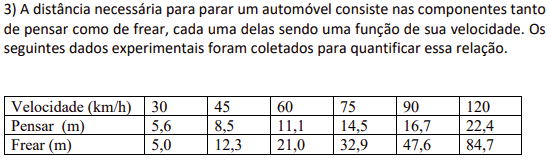

In [ ]:
velocidade = [30, 45, 60, 75, 90, 120]
pensar = [5.6, 8.5, 11.1, 14.5, 16.7, 22.4]
frear = [5.0, 12.3, 21.0, 32.9, 47.6, 84.7]

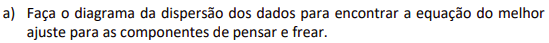

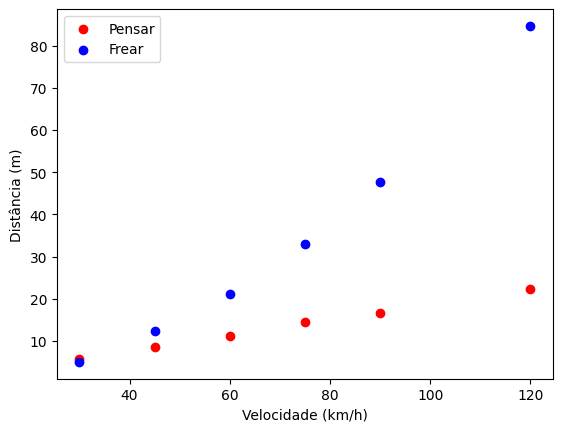


---Pensar---
Coeficientes de regressão linear para a componente de pensar:
a: 0.0800000000000182
b: 0.18647619047619027
Equação de melhor ajuste é g(x) = ax + b, segue a equação:  0.08 x +  0.1865

---Frear---
Coeficientes de regressão linear para a componente de frear:
a: 0.005878306878306839
b: 0.0009206349206410708
c: -0.09500000000020743
A equação de melhor ajuste é g(x) = ax² + bx + c, segue a equação:  0.0059 x² +  0.0009 x + -0.095


In [ ]:
dispersalGraphic(velocidade, pensar, frear, 'Pensar', 'Frear', 'Velocidade (km/h)', 'Distância (m)')

resultPensar = mmq(velocidade, pensar, 1)
print("\n---Pensar---")
print("Coeficientes de regressão linear para a componente de pensar:")
print("a:", resultPensar[0])
print("b:", resultPensar[1])
print("Equação de melhor ajuste é g(x) = ax + b, segue a equação: ", round(resultPensar[0], 4), "x + ", round(resultPensar[1], 4))

resultFrear = mmq(velocidade, frear, 2)
print("\n---Frear---")
print("Coeficientes de regressão linear para a componente de frear:")
print("a:", resultFrear[2])
print("b:", resultFrear[1])
print("c:", resultFrear[0])
print("A equação de melhor ajuste é g(x) = ax² + bx + c, segue a equação: ", round(resultFrear[2], 4), "x² + ", round(resultFrear[1], 4), "x +", round(resultFrear[0], 4))

**Resposta:** *Podemos verificar na imagem da letra B que para o componente pensar, a regressão linear satisfaz a distribuição de dados. Já para o componente frear, verificando a curva, a equação quadrática é a de melhor ajuste para os dados.*

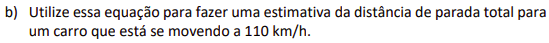

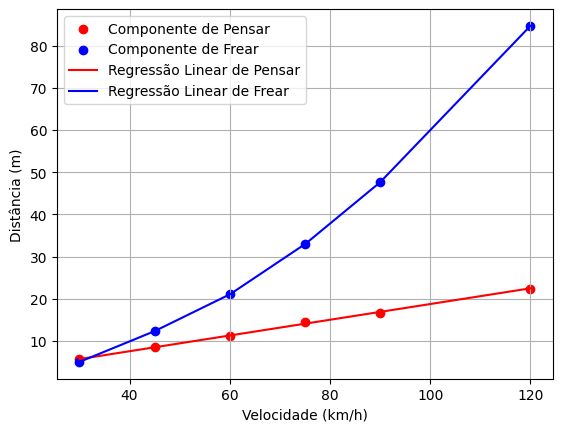


Estimativa | Pensar: 20.59 metros.
Estimativa | Frear: 71.13 metros.

Estimativa da distância para a parada total a 110 km/h é de 91.73 metros.


In [ ]:
lineGraphic(velocidade, pensar, frear, resultPensar[0], resultPensar[1], resultFrear[0], resultFrear[1], 'Velocidade (km/h)', 'Distância (m)', 'Componente de Pensar', 'Componente de Frear', 'Regressão Linear de Pensar', 'Regressão Linear de Frear')

carSpeed = 110

thinkDistance = resultPensar[0] * carSpeed + resultPensar[1]

brakeDistance = resultFrear[0] * carSpeed**2 + resultFrear[1] * carSpeed + resultFrear[2]

print("\nEstimativa | Pensar:", round(thinkDistance, 2), "metros.")
print("Estimativa | Frear:", round(brakeDistance, 2), "metros.")

totalDistance = thinkDistance + brakeDistance

print(f"\nEstimativa da distância para a parada total a {carSpeed} km/h é de {round(totalDistance, 2)} metros.")

###**Exercício 4**

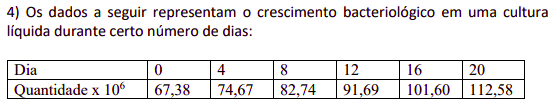

In [ ]:
day = [0, 4, 8, 12, 16, 20]
amount = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

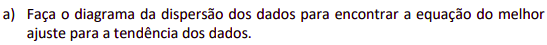

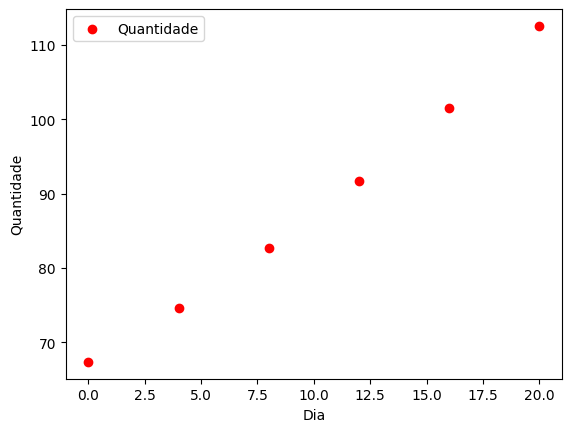

In [ ]:
dispersalGraphic(day, amount, ' ', 'Dia', 'Quantidade', ' ', ' ')

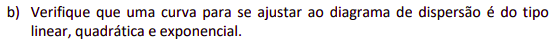

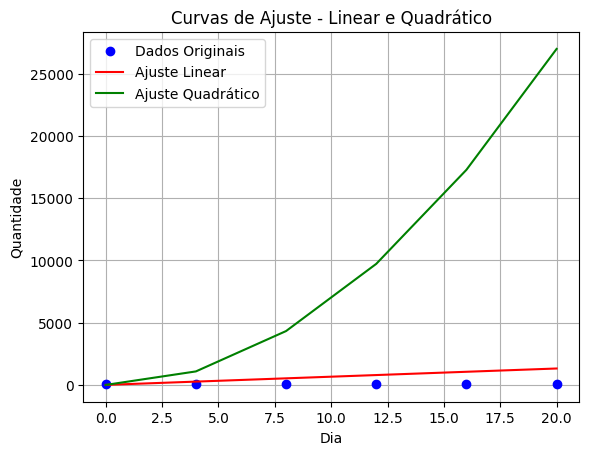

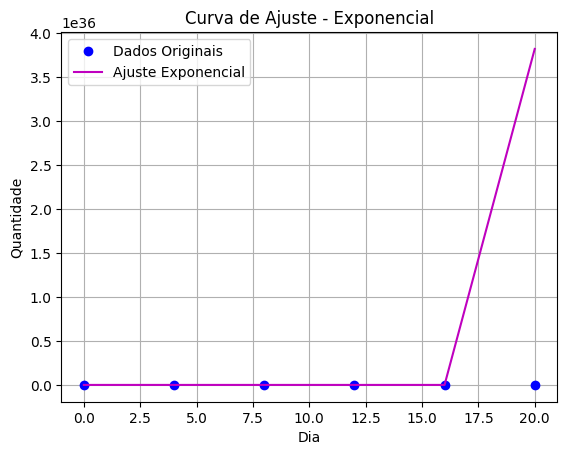

In [ ]:
# Curva linear
coefs_linear = mmq(day, amount, 1) 
curva_linear = np.polyval(coefs_linear, day) 

# Curva quadrática
coefs_quadratica = mmq(day, amount, 2)
curva_quadratica = np.polyval(coefs_quadratica, day)

# Curva exponencial
coefs_exponencial = mmq(day, np.log(amount), 1)
curva_exponencial = np.exp(np.polyval(coefs_exponencial, day))

plt.plot(day, amount, 'bo', label='Dados Originais')
plt.plot(day, curva_linear, 'r-', label='Ajuste Linear')
plt.plot(day, curva_quadratica, 'g-', label='Ajuste Quadrático')

plt.xlabel('Dia')
plt.ylabel('Quantidade')
plt.title('Curvas de Ajuste - Linear e Quadrático')
plt.legend()
plt.grid(True)
plt.show()

print()

plt.plot(day, amount, 'bo', label='Dados Originais')
plt.plot(day, curva_exponencial, 'm-', label='Ajuste Exponencial')

plt.xlabel('Dia')
plt.ylabel('Quantidade')
plt.title('Curva de Ajuste - Exponencial')
plt.legend()
plt.grid(True)
plt.show()

**Resposta:** *Como uma "prova real", resolvi plotar todos gráficos para ver qual se encaixa nos pontos, como podemos ver, é uma curva linear e a equação de melhor ajuste é g(x) = ax + b.*

image.png

In [ ]:
mmqResult = mmq(day, amount, 1)
print("--- MMQ ---")
print("a:", mmqResult[0])
print("b:", mmqResult[1])

--- MMQ ---
a: 65.89047619047624
b: 2.2552857142857112


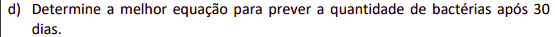

In [ ]:
for estimatedDays in range(30, 42, 2):
    estimated = mmqResult[1] * estimatedDays + mmqResult[0];
    print(f"Estimativa de bactérias para {estimatedDays} dias é de {round(estimated,2)}.")

Estimativa de bactérias para 30 dias é de 133.55.
Estimativa de bactérias para 32 dias é de 138.06.
Estimativa de bactérias para 34 dias é de 142.57.
Estimativa de bactérias para 36 dias é de 147.08.
Estimativa de bactérias para 38 dias é de 151.59.
Estimativa de bactérias para 40 dias é de 156.1.


###**Exercício 5**

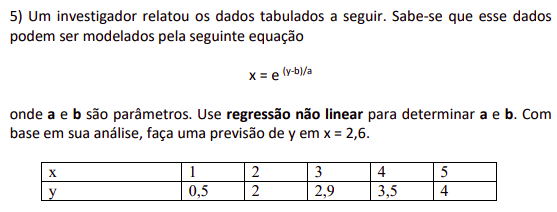

In [ ]:
x = np.array([1, 2, 3, 4, 5]) 
y = np.array([0.5, 2, 2.9, 3.5, 4])

x_log = np.log(x)

result = mmq(x_log, y, 1)

newY = (np.log(2.6) * result[1]) + result[0]
print("Novo Y:", newY)

Novo Y: 2.5756826238735413
